# Summary 

In [15]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from typing import Tuple

In [16]:
vertices = pd.read_csv('./data/vertices.csv', index_col=None)
vertices.head()

,~id,name:String
0,v0,Container
1,v1,Hashable
2,v2,Iterable
3,v3,Iterator
4,v4,Reversible


In [17]:
edges_df = pd.read_csv("./data/edges.csv", index_col=None)
edges_df.head()

,~id,~from,~to,~label
0,e0,v3,v2,extends
1,e1,v4,v2,extends
2,e2,v5,v3,extends
3,e3,v8,v6,extends
4,e4,v8,v2,extends


In [18]:
def pairing(row: pd.Series) -> Tuple[str, str]:
    return (row['~from'], row['~to'])

edges_df['pair'] = edges_df.apply(pairing, axis=1)
edges_df.head()

,~id,~from,~to,~label,pair
0,e0,v3,v2,extends,"(v3, v2)"
1,e1,v4,v2,extends,"(v4, v2)"
2,e2,v5,v3,extends,"(v5, v3)"
3,e3,v8,v6,extends,"(v8, v6)"
4,e4,v8,v2,extends,"(v8, v2)"


## DiGraph 

In [51]:
G = nx.DiGraph()
G.add_nodes_from(vertices['~id'])
G.add_edges_from(edges_df.pair)

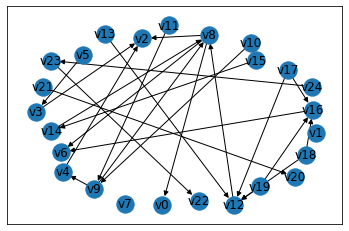

In [52]:
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos)

In [55]:
res = nx.eigenvector_centrality_numpy(G)
nx.function.density(G)

0.04

In [59]:
print(nx.function.info(G))

Name: 
Type: DiGraph
Number of nodes: 25
Number of edges: 24
Average in degree:   0.9600
Average out degree:   0.9600


In [67]:
nx.cluster.average_clustering(G)

0.0

In [100]:
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
between = nx.betweenness_centrality(G)
page_rank = nx.algorithms.pagerank_numpy(G)
df = pd.DataFrame.from_records([degree, closeness, between, page_rank], index=['degree', 'closeness', 'betweeness', 'pagerank']).T
df.head()

,degree,closeness,betweeness,pagerank
v0,0.041667,0.180060,0.000000,0.053615
v1,0.000000,0.000000,0.000000,0.019103
v2,0.125000,0.255208,0.000000,0.118524
v3,0.083333,0.041667,0.001812,0.035341
v4,0.083333,0.075000,0.002717,0.041024


In [101]:
df = pd.merge(left=df, right=vertices, left_index=True, right_on='~id').drop('~id', axis=1).set_index('name:String')
df.head()

,degree,closeness,betweeness,pagerank
name:String,,,,
Container,0.041667,0.180060,0.000000,0.053615
Hashable,0.000000,0.000000,0.000000,0.019103
Iterable,0.125000,0.255208,0.000000,0.118524
Iterator,0.083333,0.041667,0.001812,0.035341
Reversible,0.083333,0.075000,0.002717,0.041024


In [102]:
df.sort_values('degree', ascending=False).head()

,degree,closeness,betweeness,pagerank
name:String,,,,
Collection,0.250000,0.245098,0.046196,0.121806
Set,0.208333,0.166667,0.023551,0.059697
MappingView,0.166667,0.125000,0.005435,0.043459
Sequence,0.166667,0.083333,0.018116,0.051578
Iterable,0.125000,0.255208,0.000000,0.118524


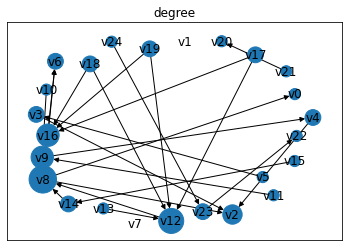

In [143]:
vertices_size = [(v*100)*30 for (k, v) in degree.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('degree')
plt.savefig("./out/ipynb/degree.png")
plt.show()

In [103]:
df.sort_values('closeness', ascending=False).head()

,degree,closeness,betweeness,pagerank
name:String,,,,
Iterable,0.125000,0.255208,0.000000,0.118524
Collection,0.250000,0.245098,0.046196,0.121806
Sized,0.083333,0.230769,0.000000,0.090555
Container,0.041667,0.180060,0.000000,0.053615
Set,0.208333,0.166667,0.023551,0.059697


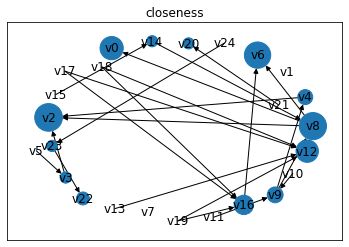

In [142]:
vertices_size = [(v*100)*30 for (k, v) in closeness.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('closeness')
plt.savefig("./out/ipynb/closeness.png")
plt.show()

In [104]:
df.sort_values('betweeness', ascending=False).head()

,degree,closeness,betweeness,pagerank
name:String,,,,
Collection,0.250000,0.245098,0.046196,0.121806
Set,0.208333,0.166667,0.023551,0.059697
Sequence,0.166667,0.083333,0.018116,0.051578
Mapping,0.083333,0.041667,0.007246,0.035341
MappingView,0.166667,0.125000,0.005435,0.043459


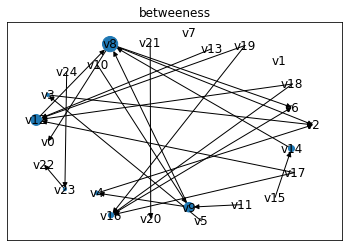

In [144]:
vertices_size = [(v*100)*50 for (k, v) in between.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('betweeness')
plt.savefig("./out/ipynb/betweeness.png")
plt.show()

In [105]:
df.sort_values('pagerank', ascending=False).head()

,degree,closeness,betweeness,pagerank
name:String,,,,
Collection,0.250000,0.245098,0.046196,0.121806
Iterable,0.125000,0.255208,0.000000,0.118524
Sized,0.083333,0.230769,0.000000,0.090555
Set,0.208333,0.166667,0.023551,0.059697
Container,0.041667,0.180060,0.000000,0.053615


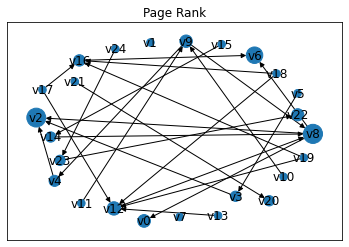

In [145]:
vertices_size = [(v*100)*30 for (k, v) in page_rank.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('Page Rank')
plt.savefig("./out/ipynb/page_rank.png")
plt.show()

In [106]:
df.sort_values('pagerank', ascending=False).head()

,degree,closeness,betweeness,pagerank
name:String,,,,
Collection,0.250000,0.245098,0.046196,0.121806
Iterable,0.125000,0.255208,0.000000,0.118524
Sized,0.083333,0.230769,0.000000,0.090555
Set,0.208333,0.166667,0.023551,0.059697
Container,0.041667,0.180060,0.000000,0.053615


In [114]:
rank_df = df.rank(ascending=False).sum(axis=1).sort_values().to_frame()
rank_df.columns = ['Sum of rank value']
rank_df.head(10)

,Sum of rank value
name:String,
Collection,5.0
Set,13.0
Sequence,19.5
MappingView,22.5
Iterable,25.0
Reversible,32.5
Sized,32.5
Mapping,35.0
Iterator,40.5


In [115]:
rank_df = df.rank(ascending=False).mean(axis=1).sort_values().to_frame()
rank_df.columns = ['Sum of rank value']
rank_df

,Sum of rank value
name:String,
Collection,1.250
Set,3.250
Sequence,4.875
MappingView,5.625
Iterable,6.250
Reversible,8.125
Sized,8.125
Mapping,8.750
Iterator,10.125
